# 📦 Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 📥 Load dataset

In [ ]:
df = pd.read_csv('/content/zomato.csv.csv',encoding='latin-1')
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [ ]:
df.tail()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
56247,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars
56248,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars
56249,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars
56250,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars
56251,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500",Pubs and bars


# 🧹 Data Cleaning

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(subset=["rate", "approx_cost(for two people)", "location"], inplace=True)

In [ ]:
df.dropna(subset=["rate", "approx_cost(for two people)", "location"], inplace=True)

 **Insight**:-
You've removed duplicates and dropped rows missing key data like rate, location, or cost, ensuring that your analysis is based on clean, usable records.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36151 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      36150 non-null  object
 1   name                         36151 non-null  object
 2   online_order                 36149 non-null  object
 3   book_table                   36149 non-null  object
 4   rate                         36151 non-null  object
 5   votes                        36149 non-null  object
 6   phone                        35738 non-null  object
 7   location                     36151 non-null  object
 8   rest_type                    36037 non-null  object
 9   dish_liked                   22180 non-null  object
 10  cuisines                     36140 non-null  object
 11  approx_cost(for two people)  36151 non-null  object
 12  listed_in(type)              33382 non-null  object
dtypes: object(13)
memory usage: 3.9+ MB


In [ ]:
df.shape

(36151, 13)

In [ ]:
df.describe().T.style.background_gradient()

,count,unique,top,freq
address,36150,11326,('Rated 4.0',755
name,36151,10189,('Rated 4.0',286
online_order,36149,2567,Yes,20904
book_table,36149,2846,No,27082
rate,36151,2837,3.9/5,1634
votes,36149,5146,0,1450
phone,35738,15629,('Rated 4.0',363
location,36151,2903,BTM,2584
rest_type,36037,2934,Quick Bites,10831
dish_liked,22180,8034,('Rated 4.0',374


In [ ]:
df.isnull().sum()

,0
address,1
name,0
online_order,2
book_table,2
rate,0
votes,2
phone,413
location,0
rest_type,114
dish_liked,13971


In [ ]:
df['rate'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0].strip())
df = df[df['rate'].str.replace('.', '', 1).str.isnumeric()]
df['rate'] = df['rate'].astype(float)

**Insight**:-
You extracted numeric values from ratings like "4.1/5" and removed "NEW" or invalid entries. This makes rate ready for analysis and modeling.**bold text**

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df = df[df['approx_cost(for two people)'].str.replace('.', '', 1).str.isnumeric()]
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

**Insight:**-
You're converting cost from strings (with commas like "1,000") to float so that cost and pricing trends can be analyzed and visualized.

In [ ]:
le = LabelEncoder()
for col in ['online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)']:
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
top_cuisines = df['cuisines'].str.split(', ').explode().value_counts().head(10)
print("\n🔝 Top 10 Cuisines:\n", top_cuisines)


🔝 Top 10 Cuisines:
 cuisines
North Indian    12996
Chinese          9745
South Indian     4708
Fast Food        4625
Biryani          3954
Continental      3907
Cafe             3437
Desserts         3364
Beverages        2796
Italian          2324
Name: count, dtype: int64


**Insight**:-
You’ve identified the most popular cuisines, which helps restaurants and investors understand customer preferences.

In [ ]:
print("\n📍 Top Locations by Average Rating:\n", df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10))


📍 Top Locations by Average Rating:
 location
50    4.170201
80    4.054260
42    4.051613
44    4.040265
12    4.021337
74    4.005000
43    3.946127
15    3.944043
51    3.929688
69    3.923457
Name: rate, dtype: float64


**Insight**:
You see which locations offer the highest-rated dining experiences — great for location-based business strategy.

In [ ]:
print("\n🛵 Online Order vs Avg Rating:\n", df.groupby('online_order')['rate'].mean())


🛵 Online Order vs Avg Rating:
 online_order
0    3.673813
1    3.732300
Name: rate, dtype: float64


**Insight**:
Compares whether restaurants that accept online orders have higher/lower average ratings.

In [ ]:
print("\n📅 Book Table vs Avg Rating:\n", df.groupby('book_table')['rate'].mean())


📅 Book Table vs Avg Rating:
 book_table
0    3.630014
1    4.139013
Name: rate, dtype: float64


**Insight**:
Analyzes whether offering table booking correlates with better ratings.

In [ ]:
print("\n💸 Correlation between Cost and Rating:\n", df['rate'].corr(df['approx_cost(for two people)']))


💸 Correlation between Cost and Rating:
 0.3849615387583018


**Insight**:
If correlation is positive: Higher cost → Higher ratings, showing customers perceive value with price.
If negative: Higher prices don’t guarantee satisfaction.

In [ ]:
print("\n🍴 Top Restaurant Types:\n", df['rest_type'].value_counts().head(10))


🍴 Top Restaurant Types:
 rest_type
73    10138
24     7536
16     2389
37     1374
36     1161
86      902
25      836
0       532
6       454
11      413
Name: count, dtype: int64


**Insight**:
Most common types of restaurants (e.g., Casual Dining, Cafe, Quick Bites). Helps analyze the market structure.

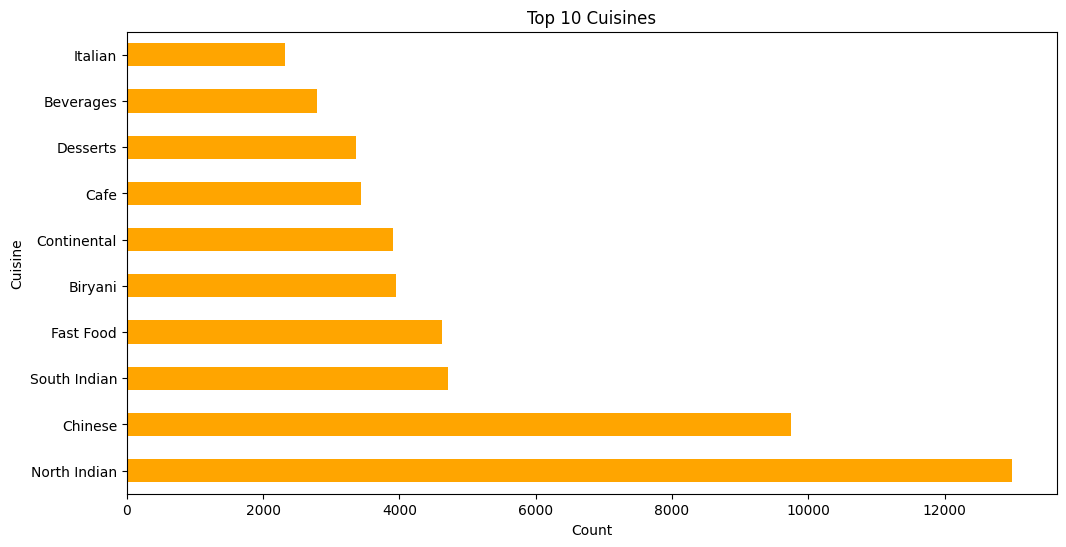

In [ ]:
plt.figure(figsize=(12,6))
top_cuisines.plot(kind='barh', color='orange')
plt.title('Top 10 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

*Visualizes which cuisines dominate the market.*

1.   North Indian
2.   Chinese

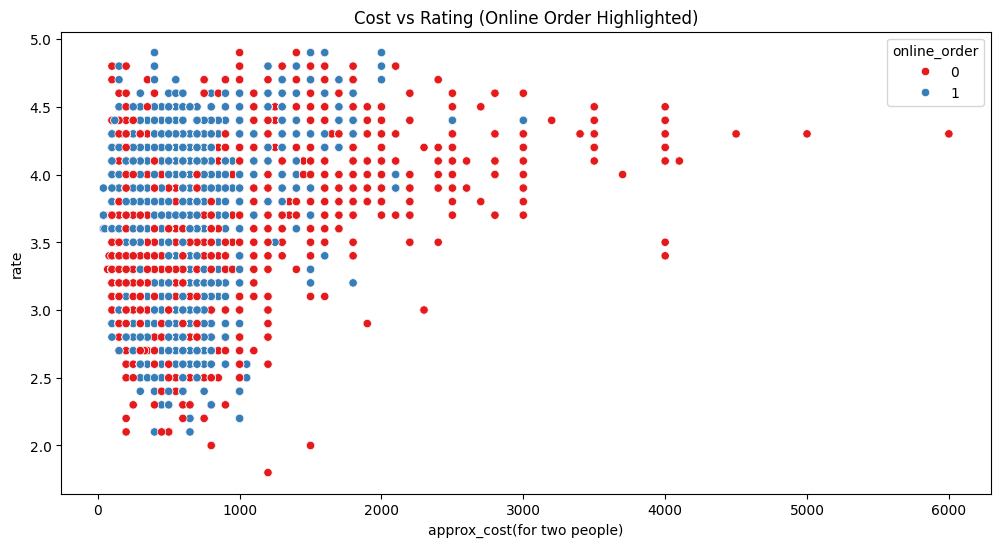

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate', hue='online_order', palette='Set1')
plt.title('Cost vs Rating (Online Order Highlighted)')
plt.show()

*See how pricing relates to customer satisfaction, colored by online order availability.*

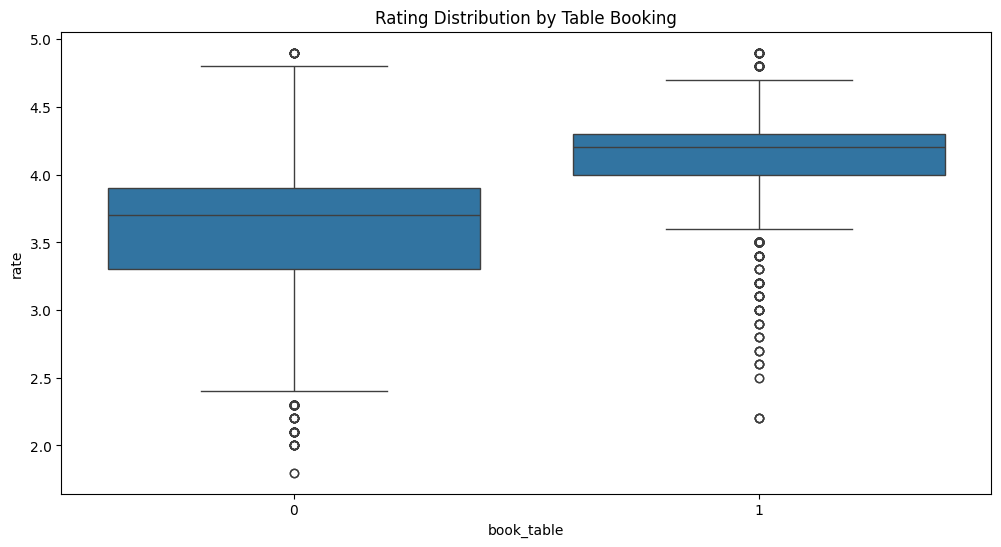

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Rating Distribution by Table Booking')
plt.show()

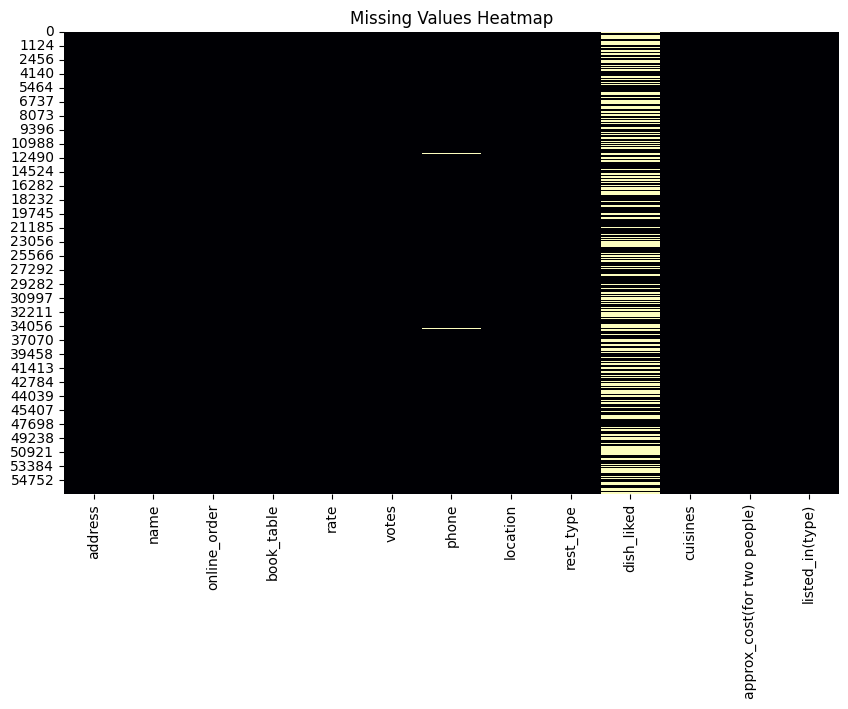

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.title("Missing Values Heatmap")
plt.show()

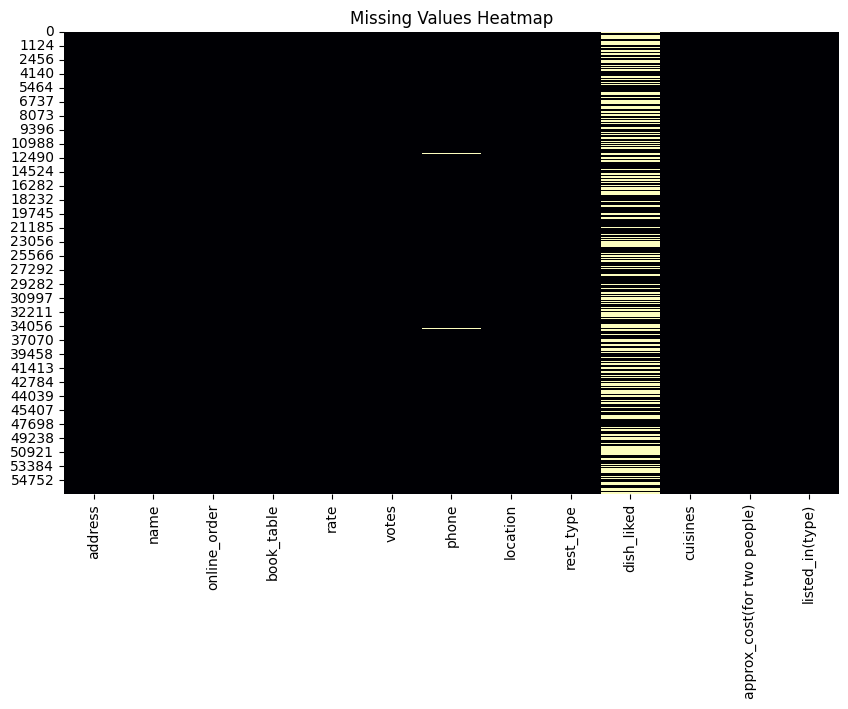

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
top_voted = df.sort_values(by='votes', ascending=False)[['name', 'votes']].head(10)
print(top_voted)

                          name votes
37534                Shanmukha   998
47690  Chapter One Bar | Maiin   997
38784              Khawa Karpo   996
4746   Maia - Eat | Bake | Mom   996
36782              Khawa Karpo   996
31394                Shanmukha   996
4064   Maia - Eat | Bake | Mom   996
31957              Khawa Karpo   995
29719              Khawa Karpo   995
30624              Khawa Karpo   995


In [ ]:
avg_rating_cuisine = df['cuisines'].str.split(', ').explode().to_frame(name='Cuisine')
avg_rating_cuisine['rate'] = df.loc[avg_rating_cuisine.index, 'rate']
print(avg_rating_cuisine.groupby('Cuisine')['rate'].mean().sort_values(ascending=False).head(10))

Cuisine
Cantonese        4.600000
African          4.507143
Singaporean      4.405556
Belgian          4.366667
Modern Indian    4.329630
Vegan            4.300000
Jewish           4.300000
Malaysian        4.296053
Sri Lankan       4.292308
German           4.283333
Name: rate, dtype: float64


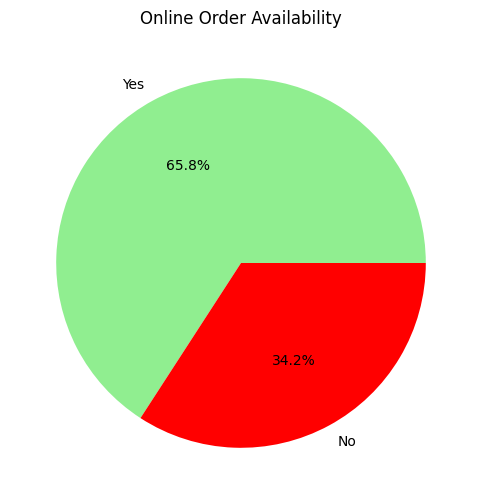

In [ ]:
plt.figure(figsize=(6,6))
df['online_order'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Yes', 'No'], colors=['lightgreen', 'red'])
plt.title("Online Order Availability")
plt.ylabel('')
plt.show()

# 🧠 Machine Learning Model (Classification)

In [ ]:
df['rating_category'] = df['rate'].apply(lambda x: 1 if x >= 4.0 else 0)

*Binary classification*:

1.   1 = High Rate
2.   0 = Low Rated

In [ ]:
features = df[['online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)', 'approx_cost(for two people)']]
target = df['rating_category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("\n🧠 Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🧠 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      5219
           1       0.85      0.75      0.80      2457

    accuracy                           0.88      7676
   macro avg       0.87      0.84      0.86      7676
weighted avg       0.88      0.88      0.88      7676

📊 Confusion Matrix:
 [[4905  314]
 [ 616 1841]]
